In [2]:
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

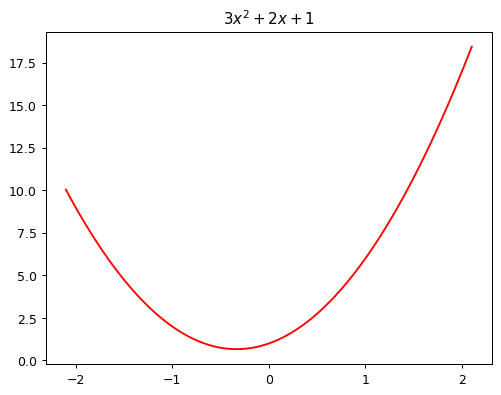

In [3]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [4]:
def quad(a, b, c, x): return a*x**2 + b*x + c


In [5]:
quad(3,2,1,1.5)

10.75

In [7]:
from functools import partial
def mk_quad(a,b,c): return partial(quad, a,b,c)

In [21]:
f = mk_quad(3,2,1)
f(1.5)

10.75

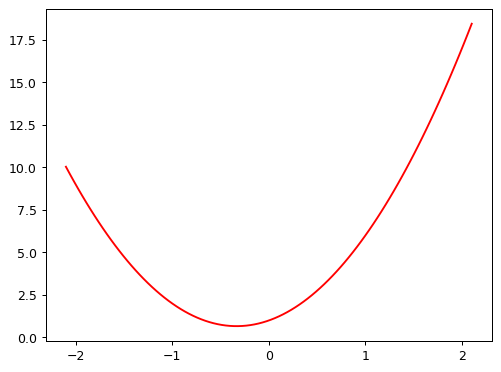

In [9]:
plot_function(f)

In [33]:
from numpy.random import normal,seed,uniform
np.random.seed(42)
def noise(x, scale): return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

note - in the lecture, the next cell was run twice. so it's the seed 42, plus one run of the random generator

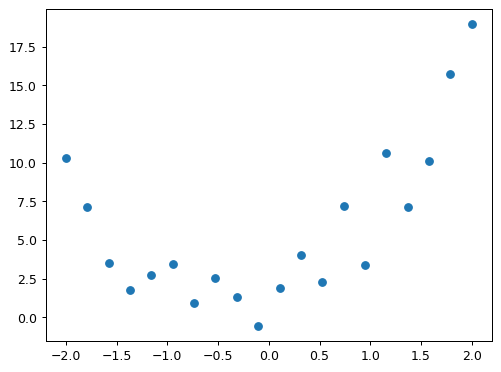

In [35]:
x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.3, 1.5)
plt.scatter(x,y)

In [36]:
from ipywidgets import interact
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a,b,c):
    plt.scatter(x, y)
    plot_function(mk_quad(a,b,c), ylim=(-3,12))

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [14]:
# Need something we can measure to tell us how the model is doing - a loss function
# how about mean squared error

def mse(preds, acts): return ((preds-acts)**2).mean()

In [37]:
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a,b,c):
    f = mk_quad(a,b,c)
    plt.scatter(x, y)
    loss=mse(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MSE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

So we have a way to manually play with some numbers to optimize the loss. Let's automate it.

In [38]:
def quad_mse(params):
    f = mk_quad(*params)
    return mse(f(x), y)

In [39]:
quad_mse([1.5, 1.5, 1.5])

tensor(11.4648, dtype=torch.float64)

In [43]:
# rank 1 tensor
abc = torch.tensor([1.5, 1.5, 1.5])
abc.requires_grad_() # Flag it, calculate gradients

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [44]:
loss = quad_mse(abc)
loss

tensor(11.4648, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [45]:
loss.backward()
abc.grad

tensor([-10.9887,  -2.1225,  -4.0015])

In [46]:
with torch.no_grad(): # standard inner thing, telling it to temporarily not calculated the gradients.... whatever
    abc -= abc.grad*0.01
    loss = quad_mse(abc)

print(f'loss={loss:.2f}')

loss=10.11


In [47]:
for i in range(5):
    loss = quad_mse(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'step={i}; loss={loss:.2f}')

step=0; loss=10.11
step=1; loss=7.88
step=2; loss=5.53
step=3; loss=3.86
step=4; loss=3.42


In [48]:
abc

tensor([3.1960, 1.9035, 2.0870], requires_grad=True)

oh my duck. it's gradient descent
and it's nearly the entire foundation for NNs